###1.

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_regression

In [3]:
data, target, coef = make_regression(n_samples=100, n_features = 2, n_informative = 2, n_targets = 1, noise = 15, coef = True, random_state = 42)

In [4]:
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

In [5]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [6]:
# инициализируем начальный вектор весов
w_gd = np.zeros(2)
w_sdg = w_gd.copy()

# список векторов весов после каждой итерации
w_gd_list = [w_gd.copy()]
w_sgd_list = [w_sdg.copy()]

# список значений ошибок после каждой итерации
errors_gd = []
errors_sgd = []

# шаг градиентного спуска
eta = 0.25

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist_gd = np.inf
weight_dist_sgd = np.inf

# счетчик итераций
iter_num_gd = 0
iter_num_sgd = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist_gd > min_weight_dist and iter_num_gd < max_iter:
    new_w = w_gd - 2 * eta * np.dot(data.T, (np.dot(data, w_gd) - target)) / target.shape[0]

    weight_dist_gd = np.linalg.norm(new_w - w_gd, ord=2)

    w_gd_list.append(new_w.copy())
    errors_gd.append(mserror(data, new_w, target))

    iter_num_gd += 1
    w_gd = new_w

# ход стохатического градиентного спуска
while weight_dist_sgd > min_weight_dist and iter_num_sgd < max_iter:

    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])

    new_w = w_sdg - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w_sdg) - target[train_ind])) / target.shape[0]

    weight_dist_sgd = np.linalg.norm(new_w - w_sdg, ord=2)

    w_sgd_list.append(new_w.copy())
    errors_sgd.append(mserror(data, new_w, target))

    iter_num_sgd += 1
    w_sdg = new_w

w_gd_list = np.array(w_gd_list)
w_sgd_list = np.array(w_sgd_list)

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors_gd[-1], 2)}')
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors_sgd[-1], 2)}')

В случае использования градиентного спуска функционал ошибки составляет 258.88
В случае использования стохастического градиентного спуска функционал ошибки составляет 263.38


Text(0, 0.5, 'MSE')

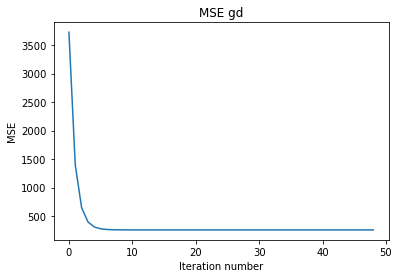

In [7]:
plt.plot(range(len(errors_gd)), errors_gd)
plt.title('MSE gd')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

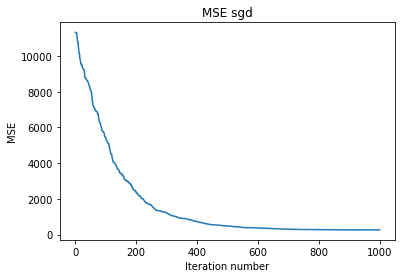

In [8]:
plt.plot(range(len(errors_sgd)), errors_sgd)
plt.title('MSE sgd')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

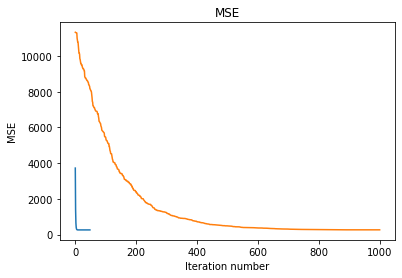

In [9]:
plt.plot(range(len(errors_gd)), errors_gd)
plt.plot(range(len(errors_sgd)), errors_sgd)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

На одном графике MSE GD и MSE SGD выглядят несуразно. Скорость сходимости GD выглядит намного больше, но и время одно итерации у GD намного выше.

###2.

Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [10]:
# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.25

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# коэффициент регуляризации
lmbda = 1e-4

np.random.seed(1234)
# ход стохатического градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:

    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])

    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)

    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target) + lmbda * sum(new_w**2))

    iter_num_sgd += 1
    w = new_w

Text(0, 0.5, 'MSE')

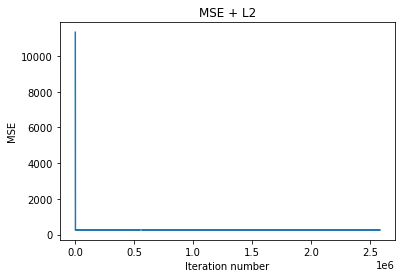

In [11]:
plt.plot(range(len(errors)), errors)
plt.title('MSE + L2')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

###3[опция].

Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [12]:
# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.25

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# коэффициент регуляризации
lmbda = 1e-4

np.random.seed(1234)
# ход стохатического градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:

    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])

    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)

    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target) + lmbda * sum(np.abs(new_w)))

    iter_num_sgd += 1
    w = new_w

Text(0, 0.5, 'MSE')

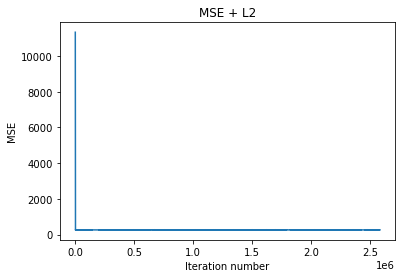

In [13]:
plt.plot(range(len(errors)), errors)
plt.title('MSE + L2')
plt.xlabel('Iteration number')
plt.ylabel('MSE')